<a href="https://colab.research.google.com/github/Finger228/Health-Insurance-Dataset/blob/master/HID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Health Insurance Dataset

Task:
- Build a model that predicts "charges" for a given person based on their features.
- Evaluate the quality of your model.
- Identify the factors with the highest impact.

Expected result - link to a GitHub repo with:
- Code for the solution (any programming language, Python or R preferred).
- Brief summary of the solution*: what did you do, which steps did you make, how to interpret the results.

# **Preparing data**

### download data from github repo

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/Finger228/Health-Insurance-Dataset/master/insurance.csv'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### preparing data

In [132]:
from sklearn.preprocessing import OneHotEncoder

# checking for miss values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


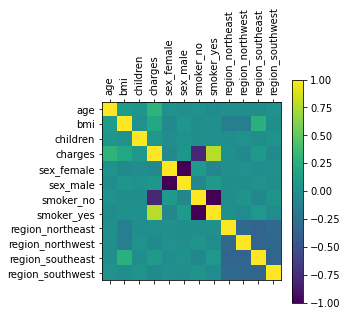

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [162]:
# convert strings to integers
df = pd.get_dummies(data)

# some data vizualizing
plt.matshow(df.corr())
plt.xticks(np.arange(12), df.columns, rotation=90)
plt.yticks(np.arange(12), df.columns, rotation=0)
plt.colorbar()
plt.show()
df.head()


### get train and test sets

In [0]:
from sklearn.model_selection import train_test_split
X, y = df.drop(columns=['charges']).values, df.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### normalize data

In [164]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
# y_train_norm = mms.fit_transform(y_train)
# y_test_norm = mms.transform(y_test)
print(X_test_norm)


[[0.58695652 0.24791499 0.4        ... 0.         0.         0.        ]
 [0.39130435 0.37826204 0.         ... 1.         0.         0.        ]
 [1.         0.29391983 0.         ... 1.         0.         0.        ]
 ...
 [0.43478261 0.32458972 0.2        ... 0.         0.         0.        ]
 [0.7826087  0.84611246 0.         ... 0.         1.         0.        ]
 [0.7173913  0.49071832 0.2        ... 0.         0.         1.        ]]


# **Predictive model**

### Standard linear regression

Score:  0.7508582235962915
Weights:  [   269.96658188    363.34919683    407.79662064    104.50059831
   -104.50059831 -11874.89623958  11874.89623958    672.49050954
    189.08029235   -700.53785191   -161.03294998]


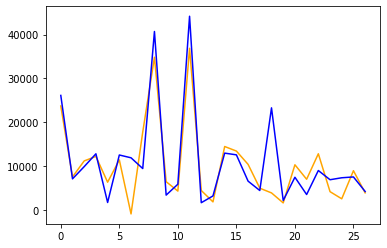

In [176]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Score: ', regr.score(X_test, y_test))
print('Weights: ', regr.coef_)

plt.plot(regr.predict(X_test[::10]), color="orange")
plt.plot(y_test[::10], color="blue")
plt.show()

### ridge regression

Score:  0.7508548478496051
Weights:  [   269.96422458    363.34092666    407.7966947     104.41070237
   -104.41070238 -11873.20017943  11873.20017961    672.38009065
    189.01572217   -700.295049     -161.10076382]


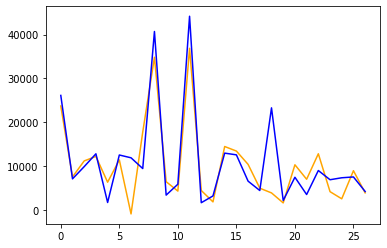

In [180]:
from sklearn import linear_model

regr = linear_model.Ridge (alpha = .05)
regr.fit(X_train, y_train)
print('Score: ', regr.score(X_test, y_test))
print('Weights: ', regr.coef_)

plt.plot(regr.predict(X_test[::10]), color="orange")
plt.plot(y_test[::10], color="blue")
plt.show()

### Compare ridge and linear regressions

In [173]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True)
    lineReg = linear_model.LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .01)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.7444876701438183
[   257.23330153    338.34631276    477.71310168     64.23032664
    -64.23032664 -11921.77119127  11921.77119127    589.8587901
    236.52267845   -444.84174958   -381.53971897]

Ridge Regression
0.7423693522153715
[   256.56617212    338.72545127    475.62954347     66.35815391
    -66.35815391 -11922.11518131  11922.11518132    587.88930312
    231.70945882   -440.31623346   -379.28252847]


# **Test result**

In [181]:
regr.predict([[60, 28, 0, 1, 0, 0, 1, 0, 0,	0, 1]])

array([36349.64209565])